# __Biodiversity Portfolio Project Codecademy__

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Reading in and backing up the data.

In [2]:
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

observations_backup = observations_df.copy()
species_backup = species_df.copy()

## Inspecting observations_df

In [3]:
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Observatioins_df contains 3 columns and 23296 observations

In [4]:
observations_df.shape

(23296, 3)

## Observations has no missing observations

In [5]:
observations_df.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

## 2 object columns and 1 integer

In [6]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


## Summary Statistics

In [46]:
observations_df.describe().round(2)

,observations
count,23281.00
mean,142.28
std,69.89
min,9.00
25%,86.00
50%,124.00
75%,195.00
max,321.00


## Inspecting species dataset

In [8]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


## Multiple observations in the species dataset are recorded under different common names
- 265 scientific names appear twice in the dataset due to different common name values
- 9 scientific names appear three times in the dataset due to different common name values

In [9]:
duplicated_names = species_df.loc[species_df.scientific_name.duplicated(keep= 'first')]
duplicate_name_count = duplicated_names.scientific_name.value_counts()

duplicate_name_count.value_counts()

count
1    265
2      9
Name: count, dtype: int64

## 96.72 % of the conservation_status variable is missing.

In [10]:
round((species_df.isnull().sum() / species_df.shape[0]) * 100, 2)

category                0.00
scientific_name         0.00
common_names            0.00
conservation_status    96.72
dtype: float64

## Columns has a total of 5 unique observations. Data is structurally missing.

In [11]:
species_df.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

## observations_df has 15 duplicate observations

In [12]:
f'{observations_df.duplicated().sum()}'

'15'

## Dropping duplicated values in observations_df

In [13]:
observations_df.drop_duplicates(inplace= True)

## observations_df now has 23,281 observations & 3 columns

In [14]:
observations_df.shape

(23281, 3)

## Merging the observations and species dataframes

In [15]:
species_obs = observations_df.merge(species_df, how= 'outer', on= 'scientific_name', indicator= True)

species_obs_copy = species_obs.copy()
species_obs.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,_merge
0,Abies bifolia,Bryce National Park,109,Vascular Plant,Rocky Mountain Alpine Fir,NaN,both
1,Abies bifolia,Yellowstone National Park,215,Vascular Plant,Rocky Mountain Alpine Fir,NaN,both
2,Abies bifolia,Great Smoky Mountains National Park,72,Vascular Plant,Rocky Mountain Alpine Fir,NaN,both
3,Abies bifolia,Yosemite National Park,136,Vascular Plant,Rocky Mountain Alpine Fir,NaN,both
4,Abies concolor,Great Smoky Mountains National Park,101,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN,both


## species_obs has 25,601 observations and 7 columns 
- obserations were duplicated due to multiple scientfic names being recorded with different common names.
- the merge should be a one-to-one match.
- I received 25,601 observatons while I expected 23,281 a difference of 2,320 observations.
- These observations can bias the dataset as they record the same observation multiple times for the same species just under a different common name.

In [16]:
species_obs.shape

(25601, 7)

## Steps taken to handle row explosion:
- create a list of unique common names from the filter duplicate_names which contains only the second duplicate vlaue of each scientific_name that records a different common_name.
- use that list of common names to filter species_obs_2 thus recording only one common name for each scientific name.
- In order to preserve the common names excluded from the dataset all common names not stored in species_obs_2 are stored in common_name_frame for later reference.
- species_obs_2 now contains 23,249 observations 32 less than expected.

In [17]:
common_name_list = list(duplicated_names.common_names.unique())

species_obs_2 = species_obs[species_obs.common_names.isin(common_name_list) == False]
common_name_frame = species_obs[species_obs.common_names.isin(common_name_list) == True]

species_obs_2.shape

(23249, 7)

## Edge case:
- Because some (32) of the observations contained only 1 common name, filtering the dataset using the unique common_name values removed those values from species_obs_2 thus causing me to lose 32 unique observations.
- Therefore, I took the scientific_name values stored in common_name_frame that were not recorded in species_obs_2 and stored them in missing_obs.
- There was one duplication in the dataframe due to a different conservation_status observation. The observation containing the consveration_status value was kept and the other duplicaate value was removed from the dataframe and stored back into missing_obs whicn now contains all missing 32 observations.

In [18]:
missing_obs = common_name_frame[~common_name_frame.scientific_name.isin(species_obs_2.scientific_name)]

# dropping the scientific name Oncorthynshu mykiss name values that are null and kepping those w/ a conservation status
missing_obs = missing_obs.drop(missing_obs.loc[(missing_obs.conservation_status.isnull()) & (missing_obs.scientific_name == 'Oncorhynchus mykiss')].index)

missing_obs.shape

(32, 7)

## Inspecting missing_obs

In [19]:
missing_obs.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,_merge
9650,Felis concolor,Great Smoky Mountains National Park,72,Mammal,Mountain Lion,NaN,both
9651,Felis concolor,Yellowstone National Park,284,Mammal,Mountain Lion,NaN,both
9652,Felis concolor,Yosemite National Park,146,Mammal,Mountain Lion,NaN,both
9653,Felis concolor,Bryce National Park,65,Mammal,Mountain Lion,NaN,both
13540,Lontra canadensis,Bryce National Park,99,Mammal,River Otter,NaN,both


## Concatenating missing_obs to the end of species_obs_2

In [20]:
species_obs_2 = pd.concat([species_obs_2, missing_obs], ignore_index= True)

species_obs_2.shape

(23281, 7)

# __What is the distribution for conservation status?__

Text(0, 0.5, 'Conservation Status')

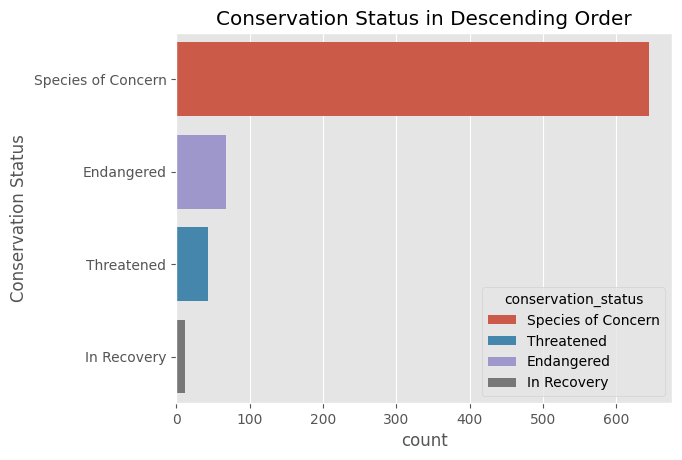

In [21]:
sns.countplot(
    y= 'conservation_status',
    hue= 'conservation_status',
    order= species_obs_2['conservation_status'].value_counts().index,
    data= species_obs_2
)
plt.title('Conservation Status in Descending Order')
plt.ylabel('Conservation Status')


## __Proportion of Species of Concern vs. Other Consveratioin Status__

Text(0.5, 1.0, 'Conservation Status Count Proportion')

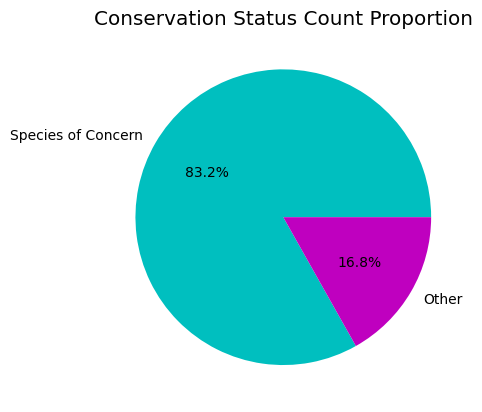

In [45]:
conservation_prop = species_obs_2['conservation_status'].value_counts(normalize= True).round(2)

conservation_prop['Other'] = conservation_prop[1:].sum().round(2)

conservation_prop.drop(index= ['Endangered', 'Threatened', 'In Recovery'], axis= 0, inplace= True)

plt.pie(
    x= conservation_prop,
    labels= ['Species of Concern', 'Other'],
    autopct= '%1.1f%%',
    colors= ['c', 'm']
)
plt.title('Conservation Status Count Proportion')

## __Are certain types of species more likely to be in danger?__

## __Proportion of Species Type w/ Some Type of Conservation Status__

Text(0.5, 1.0, 'Proportion of Species Type w/ Some Type of Conservation Status')

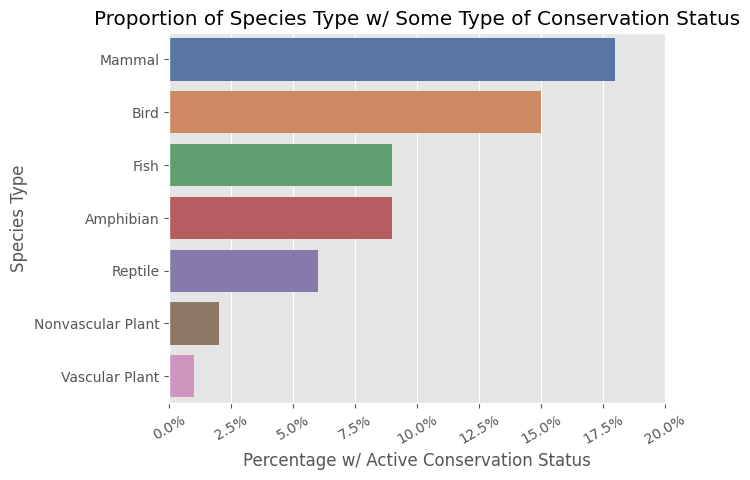

In [47]:
species_category_con_count = species_obs_2.groupby('category')['conservation_status'].count()

species_count = species_obs_2.groupby('category')['category'].count()

species_prop = species_category_con_count / species_count

ax = sns.barplot(
    x= species_prop.round(2).sort_values(ascending= False),
    y= species_prop.sort_values(ascending= False).index,
    hue= species_prop.index,
    palette= 'deep',
    legend= False
)

xticks = ax.get_xticks()
plt.xticks(ticks= xticks, labels= [f'{x:.1%}' for x in xticks], rotation= 30)
plt.xlabel('Percentage w/ Active Conservation Status')
plt.ylabel('Species Type')
plt.title('Proportion of Species Type w/ Some Type of Conservation Status')

## __Are the differences between species and their conservation status significant?__

## __importing chi2_contingency function from scipy.stats library__

In [24]:
from scipy.stats import chi2_contingency

## __Creating contingency table using the pandas crosstab function__

In [25]:
species_con_table = pd.crosstab(species_obs_2['category'], species_obs_2['conservation_status'])

species_con_table

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,4,0,16,8
Bird,16,12,288,0
Fish,12,0,16,20
Mammal,32,0,112,8
Nonvascular Plant,0,0,20,0
Reptile,0,0,20,0
Vascular Plant,4,0,172,8


## __Crosstab results__
- Null Hyptothesis: There is no relationship between species type and conservation status
- Alternative Hypothesis: There is a relationship between species type and conservation status
- chi2 statistic: 254.63 > critical value: 28.86
- significant result for p value (reject the null hypothesis)
- dof: 18 = critical value: 28.86

In [26]:
chi2, p_value, dof, expected = chi2_contingency(species_con_table)

print(f"chi2: {chi2} \np_value: {p_value} \ndof: {dof} \nexpected: {expected}")

chi2: 254.6336752707089 
p_value: 9.30059123736331e-44 
dof: 18 
expected: [[  2.47916667   0.4375      23.47916667   1.60416667]
 [ 27.97916667   4.9375     264.97916667  18.10416667]
 [  4.25         0.75        40.25         2.75      ]
 [ 13.45833333   2.375      127.45833333   8.70833333]
 [  1.77083333   0.3125      16.77083333   1.14583333]
 [  1.77083333   0.3125      16.77083333   1.14583333]
 [ 16.29166667   2.875      154.29166667  10.54166667]]


## __Heatmap of standardized residuals__
- residuals >= 2 strongly contributes to the observed significant result.
- Quite a few strong residuals located in the Amphibian, Bird, Fish, and Mammal categories

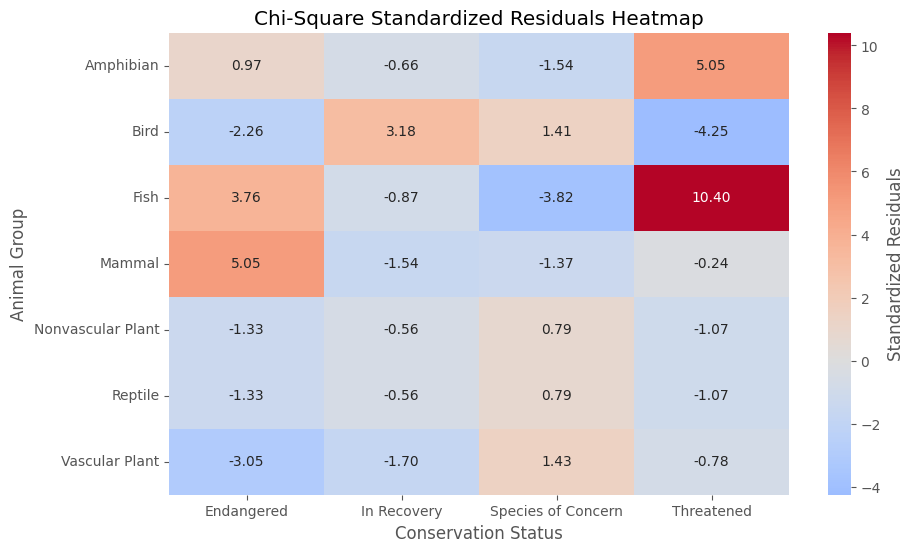

In [27]:
residuals = (species_con_table - expected) / np.sqrt(expected)

plt.figure(figsize=(10,6))
sns.heatmap(residuals, annot=True, fmt=".2f", center=0, cmap="coolwarm", cbar_kws={'label': 'Standardized Residuals'})
plt.title("Chi-Square Standardized Residuals Heatmap")
plt.ylabel("Animal Group")
plt.xlabel("Conservation Status")
plt.show()

## __Cramers V application to determine strength of association__
- moderate association of 0.33 according to Cohen's Rules of Thumb

In [28]:
n = np.sum(species_con_table.values)
r, c = species_con_table.shape
k = min(r, c)

cramers_v = np.sqrt(chi2 / (n * (k-1)))

cramers_v.round(2)

np.float64(0.33)

# __Which speecies were spotted the most at each park?__

### Grouping by park_name & category and counting by category then storing the result in species_by_park

In [49]:
species_by_park = species_obs_2.groupby(['park_name', 'category'])['category'].count()

species_by_park.rename('value', inplace= True)

species_by_park = species_by_park.reset_index()

species_by_park.head()

,park_name,category,value
0,Bryce National Park,Amphibian,80
1,Bryce National Park,Bird,521
2,Bryce National Park,Fish,127
3,Bryce National Park,Mammal,214
4,Bryce National Park,Nonvascular Plant,333


- created list of each park
- iterated through species_by_park and plotted the counts of each category of species observed in each park

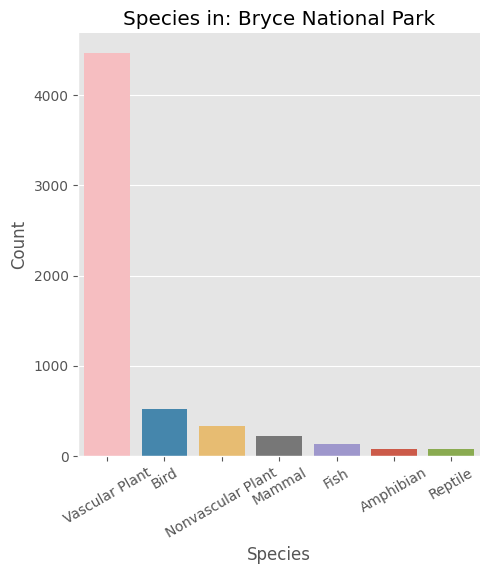

<Figure size 640x480 with 0 Axes>

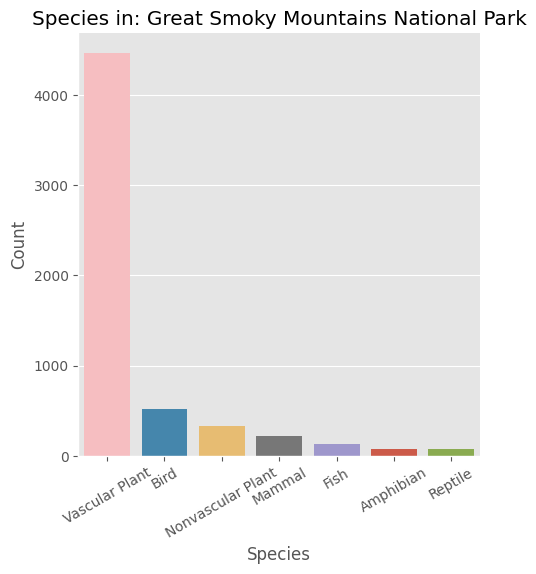

<Figure size 640x480 with 0 Axes>

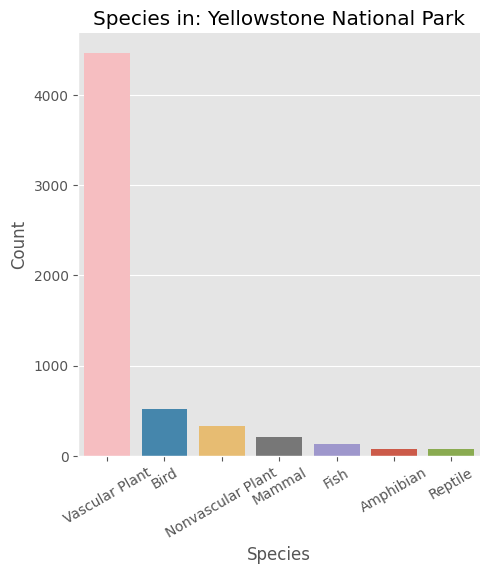

<Figure size 640x480 with 0 Axes>

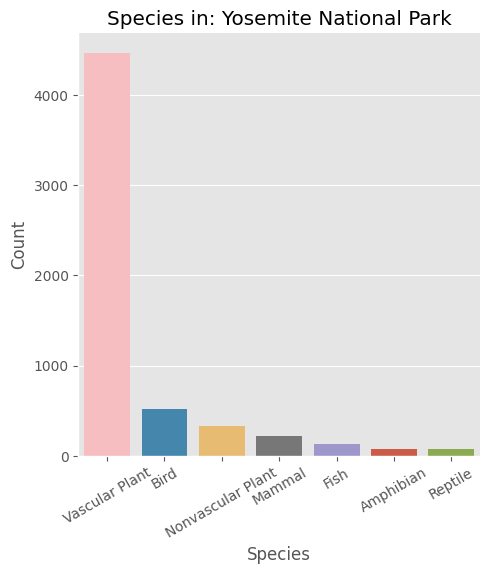

<Figure size 640x480 with 0 Axes>

In [30]:
park_name = list(species_by_park.park_name.unique())

for park in park_name:
    sns.catplot(
        x= 'category',
        y= 'value',
        order= species_by_park.sort_values('value', ascending= False)['category'].unique(),
        data= species_by_park[species_by_park.park_name == park],
        kind= 'bar',
        hue= 'category'
    )
    plt.title(f'Species in: {park}')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.xticks(rotation= 30)
    plt.show()
    plt.clf()
    

- sorted the dataframe in descending order by park_name & observations
- split the common_names feature for better readability when plotting
- iterated through park_names again this time plotting the top 10 species by observations in each park.

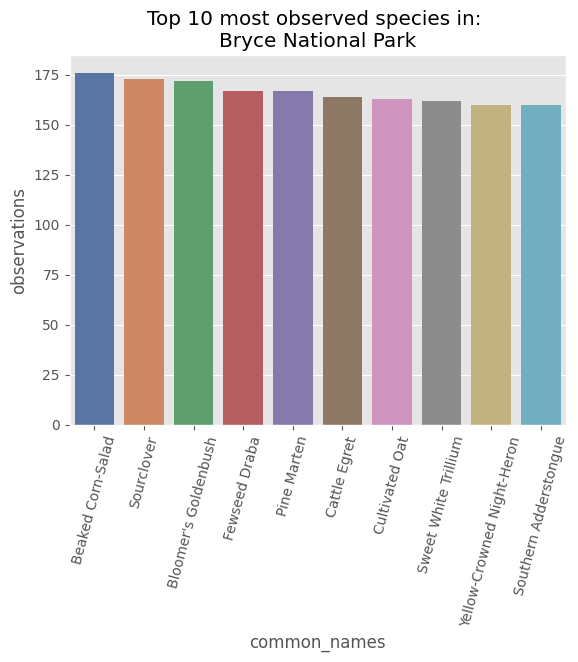

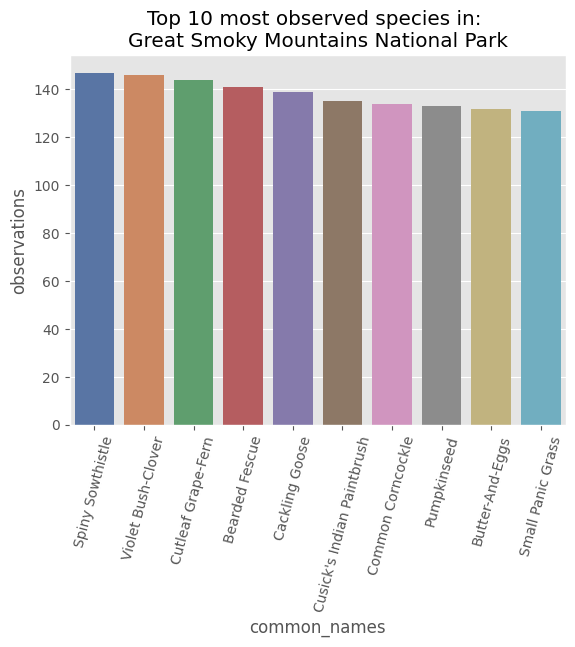

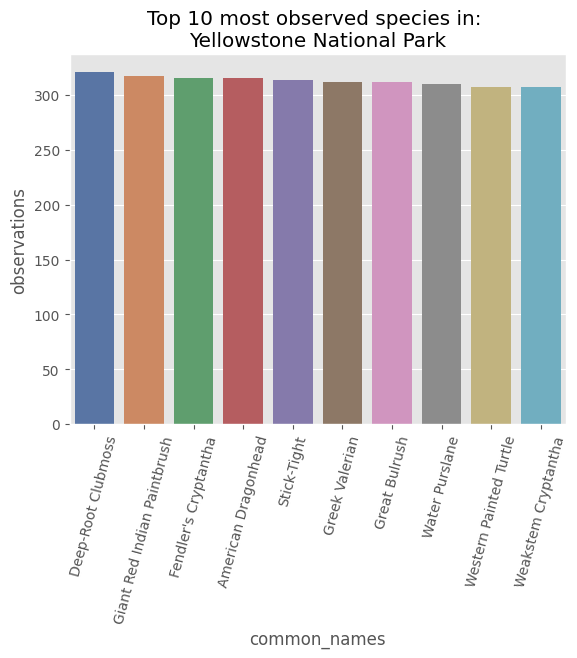

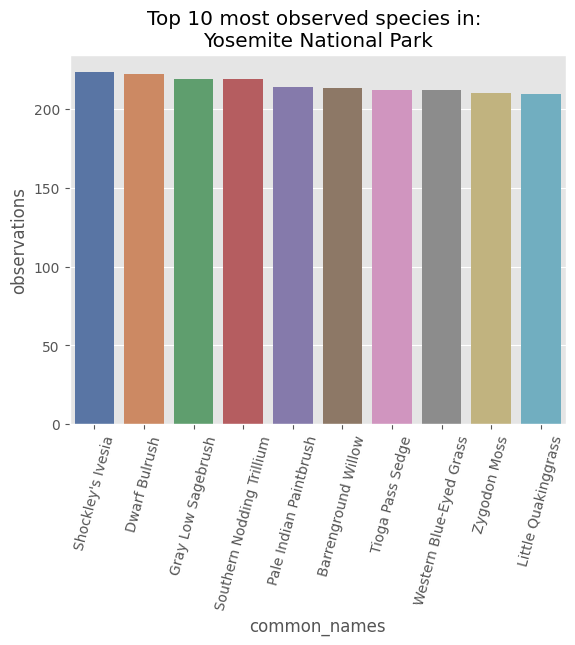

<Figure size 640x480 with 0 Axes>

In [31]:
sorted_observations = species_obs_2.sort_values(['park_name', 'observations'], ascending= False)

split_names = sorted_observations['common_names'].str.split(pat= ',', n= 1, regex= True, expand= True)
sorted_observations['common_names'] = split_names[0]
sorted_observations['common_names_split'] = split_names[1]


for park in park_name:
    sns.barplot(
        data= sorted_observations[sorted_observations['park_name'] == park].head(10),
        x= 'common_names',
        y= 'observations',
        hue= 'common_names',
        palette= 'deep'
    )
    plt.xticks(rotation= 75)
    plt.title(f'Top 10 most observed species in: \n{park}')
    plt.show()
    plt.clf()